In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Problem 1:

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [10]:
df=pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [11]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [13]:
print("The number of rows in the dataframe is",df.shape[0])
print("The number of columns in the dataframe is",df.shape[1])

The number of rows in the dataframe is 1525
The number of columns in the dataframe is 10


In [14]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525,NaN,NaN,NaN,763,440.374,1,382,763,1144,1525
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for column in df[["vote","economic.cond.national","Blair","Hague","Europe","political.knowledge","gender"]]:
 print(column.upper(),':',df[column].nunique())
 print(df[column].value_counts().sort_values())
 print('\n')

VOTE : 2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL : 5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


BLAIR : 5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE : 5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE : 11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE : 4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER : 2
male      713
female    812
Name: gender, dtype: int64




In [17]:
dups=df.duplicated()
print("The number of duplicate rows =%d" % (dups.sum()))
df[dups]

The number of duplicate rows =0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [18]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [19]:
# Central values for 'age' variable
df.age.describe()

count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

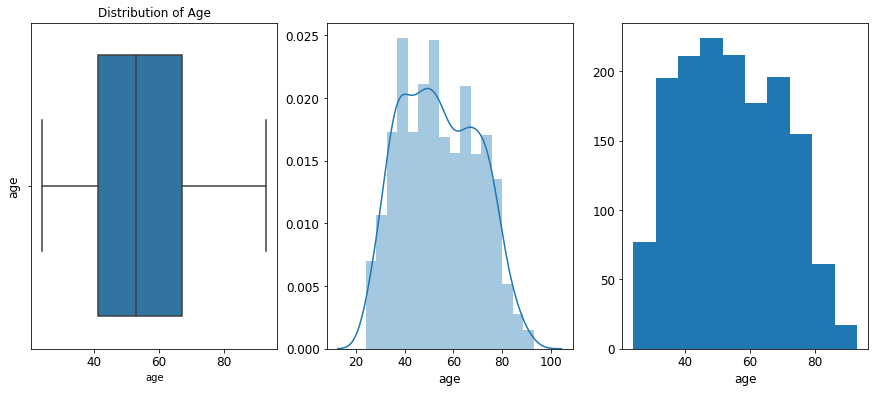

In [20]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "Age" variable
sns.boxplot(x='age',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('age',fontsize=12)
ax1.set_title('Distribution of Age',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "age variable"
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('age',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "age" variable
ax3.hist(df['age'])

ax3.set_xlabel('age',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()


In [21]:
# Central values for 'economic.cond.national' veconomic.cond.nationalariable
df['economic.cond.national'].describe()

count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

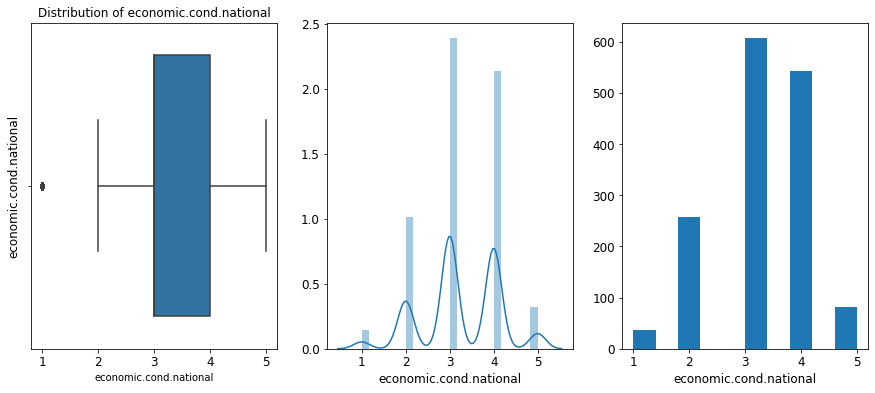

In [22]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "economic.cond.national" variable
sns.boxplot(x='economic.cond.national',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('economic.cond.national',fontsize=12)
ax1.set_title('Distribution of economic.cond.national',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "economic.cond.national" variable
sns.distplot(df['economic.cond.national'],ax=ax2)
ax2.set_xlabel('economic.cond.national',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "economic.cond.national" variable
ax3.hist(df['economic.cond.national'])
ax3.set_xlabel('economic.cond.national',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()


In [23]:
# Central values for "economic.cond.household" variable
df["economic.cond.household"].describe()

count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

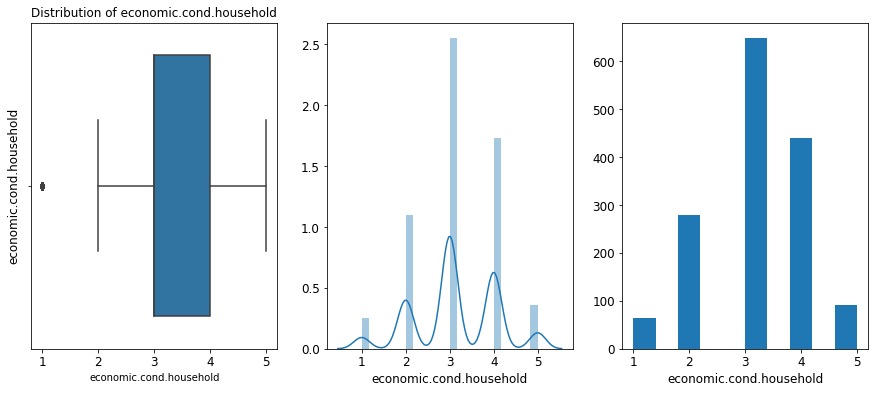

In [24]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "economic.cond.household" variable
sns.boxplot(x='economic.cond.household',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('economic.cond.household',fontsize=12)
ax1.set_title('Distribution of economic.cond.household',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "economic.cond.national" variable
sns.distplot(df['economic.cond.household'],ax=ax2)
ax2.set_xlabel('economic.cond.household',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "economic.cond.household" variable
ax3.hist(df['economic.cond.household'])
ax3.set_xlabel('economic.cond.household',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()

In [25]:
# Central values for 'Blair' variable
df.Blair.describe()

count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

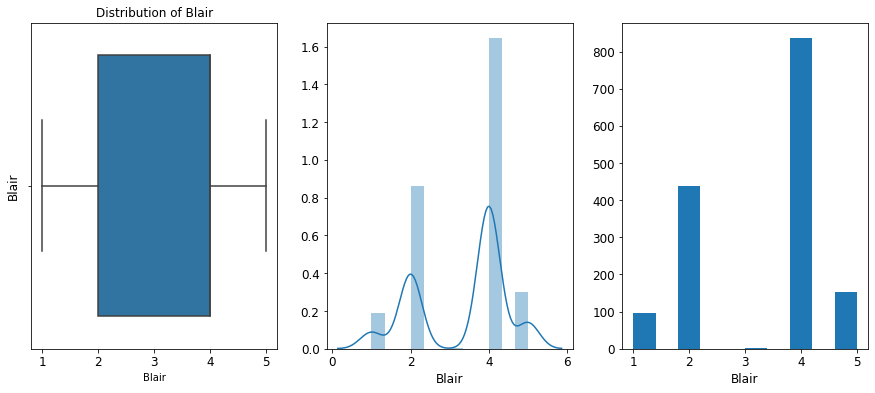

In [26]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "Blair" variable
sns.boxplot(x='Blair',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('Blair',fontsize=12)
ax1.set_title('Distribution of Blair',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "Blair"variable
sns.distplot(df['Blair'],ax=ax2)
ax2.set_xlabel('Blair',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "Blair" variable
ax3.hist(df['Blair'])
ax3.set_xlabel('Blair',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()

In [27]:
# Central values for 'Hague' variable
df.Hague.describe()

count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

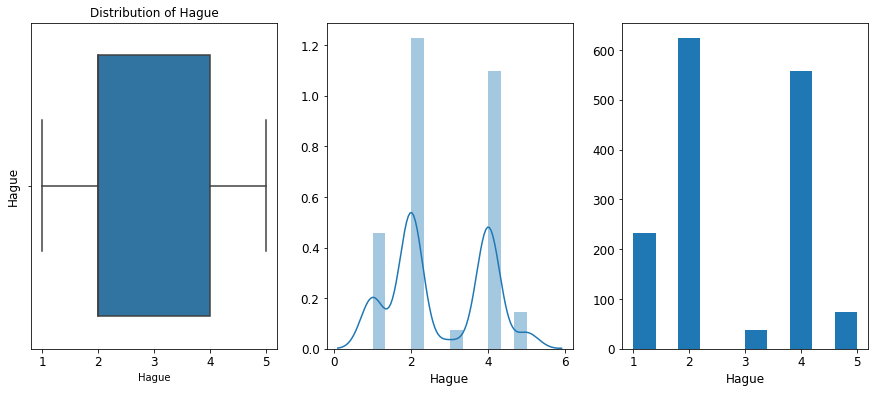

In [28]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "Hague" variable
sns.boxplot(x='Hague',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('Hague',fontsize=12)
ax1.set_title('Distribution of Hague',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "Hague"variable
sns.distplot(df['Hague'],ax=ax2)
ax2.set_xlabel('Hague',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "Hague" variable
ax3.hist(df['Hague'])
ax3.set_xlabel('Hague',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()

In [29]:
# Central Values for 'Europe' variable
df.Europe.describe()

count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

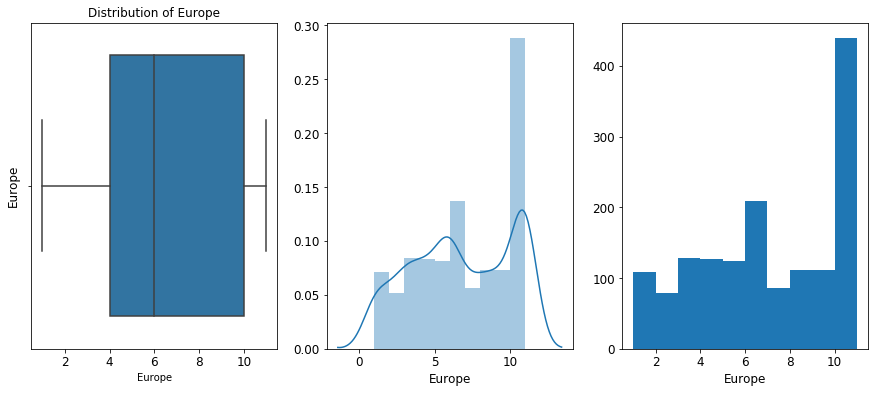

In [30]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "Europe" variable
sns.boxplot(x='Europe',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('Europe',fontsize=12)
ax1.set_title('Distribution of Europe',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "Europe"variable
sns.distplot(df['Europe'],ax=ax2)
ax2.set_xlabel('Europe',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "Europe" variable
ax3.hist(df['Europe'])
ax3.set_xlabel('Europe',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()

In [31]:
#Central values for 'political.knowledge' variable
df['political.knowledge'].describe()

count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

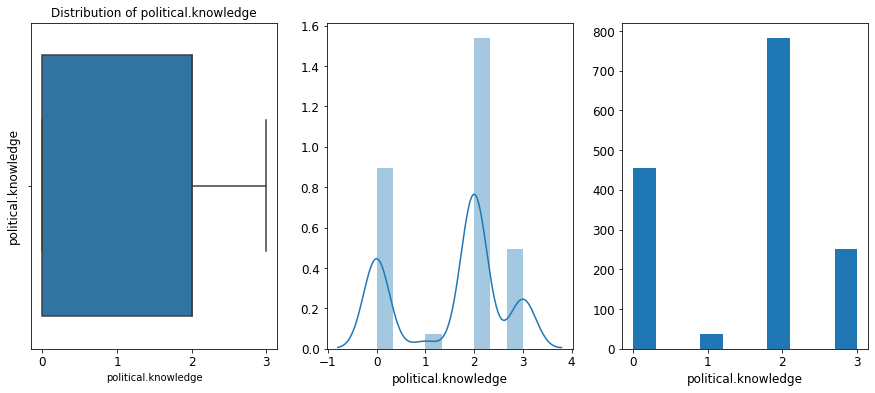

In [32]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
## boxplot for "political.knowledge" variable
sns.boxplot(x='political.knowledge',data=df, orient='Vertical',ax=ax1)
ax1.set_ylabel('political.knowledge',fontsize=12)
ax1.set_title('Distribution of political.knowledge',fontsize=12)
ax1.tick_params(labelsize=12)
## distplot for "political.knowledge"variable
sns.distplot(df['political.knowledge'],ax=ax2)
ax2.set_xlabel('political.knowledge',fontsize=12)
ax2.tick_params(labelsize=12)
## hisotgram for "political.knowledge" variable
ax3.hist(df['political.knowledge'])
ax3.set_xlabel('political.knowledge',fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()

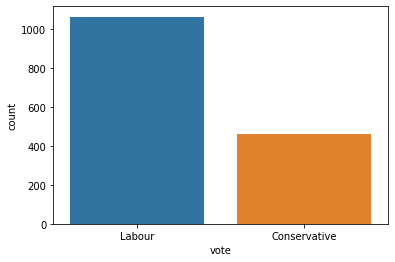

In [33]:
# Count for 'vote' variable
sns.countplot(data=df,x='vote')
plt.show()

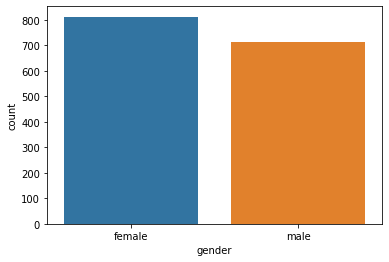

In [34]:
# count for 'gender' variable
sns.countplot(data=df,x='gender')
plt.show()

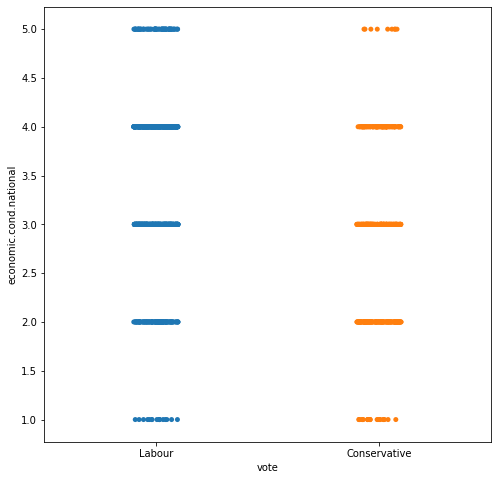

In [35]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'],df['economic.cond.national'])
plt.show()

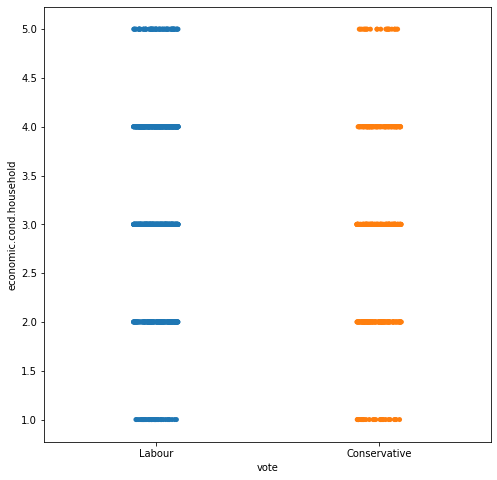

In [36]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'],df['economic.cond.household'])
plt.show()

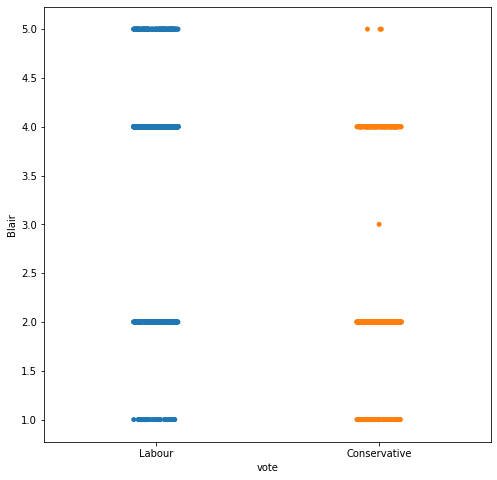

In [37]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'],df['Blair'])
plt.show()

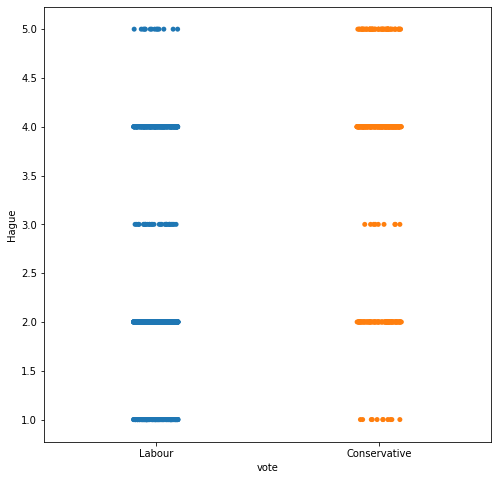

In [38]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'],df['Hague'])
plt.show()

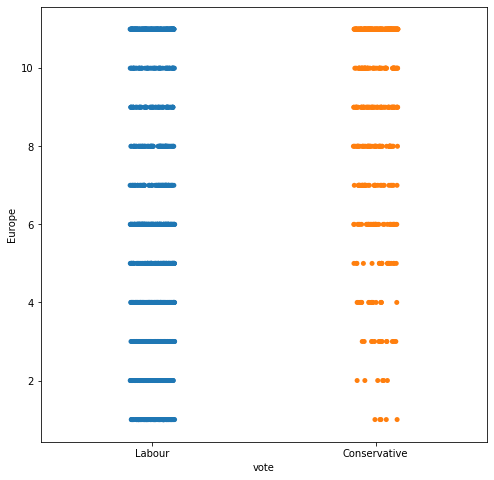

In [39]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'],df['Europe'])
plt.show()

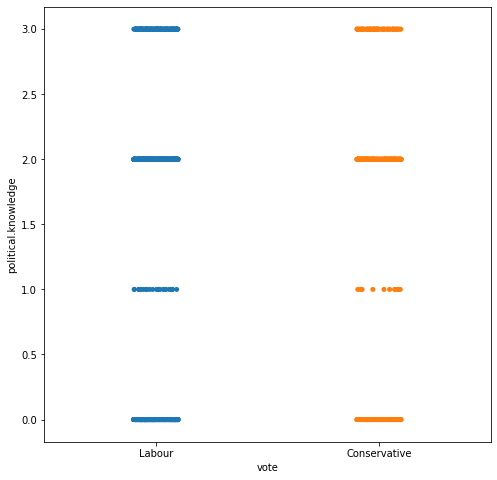

In [40]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'],df['political.knowledge'])
plt.show()

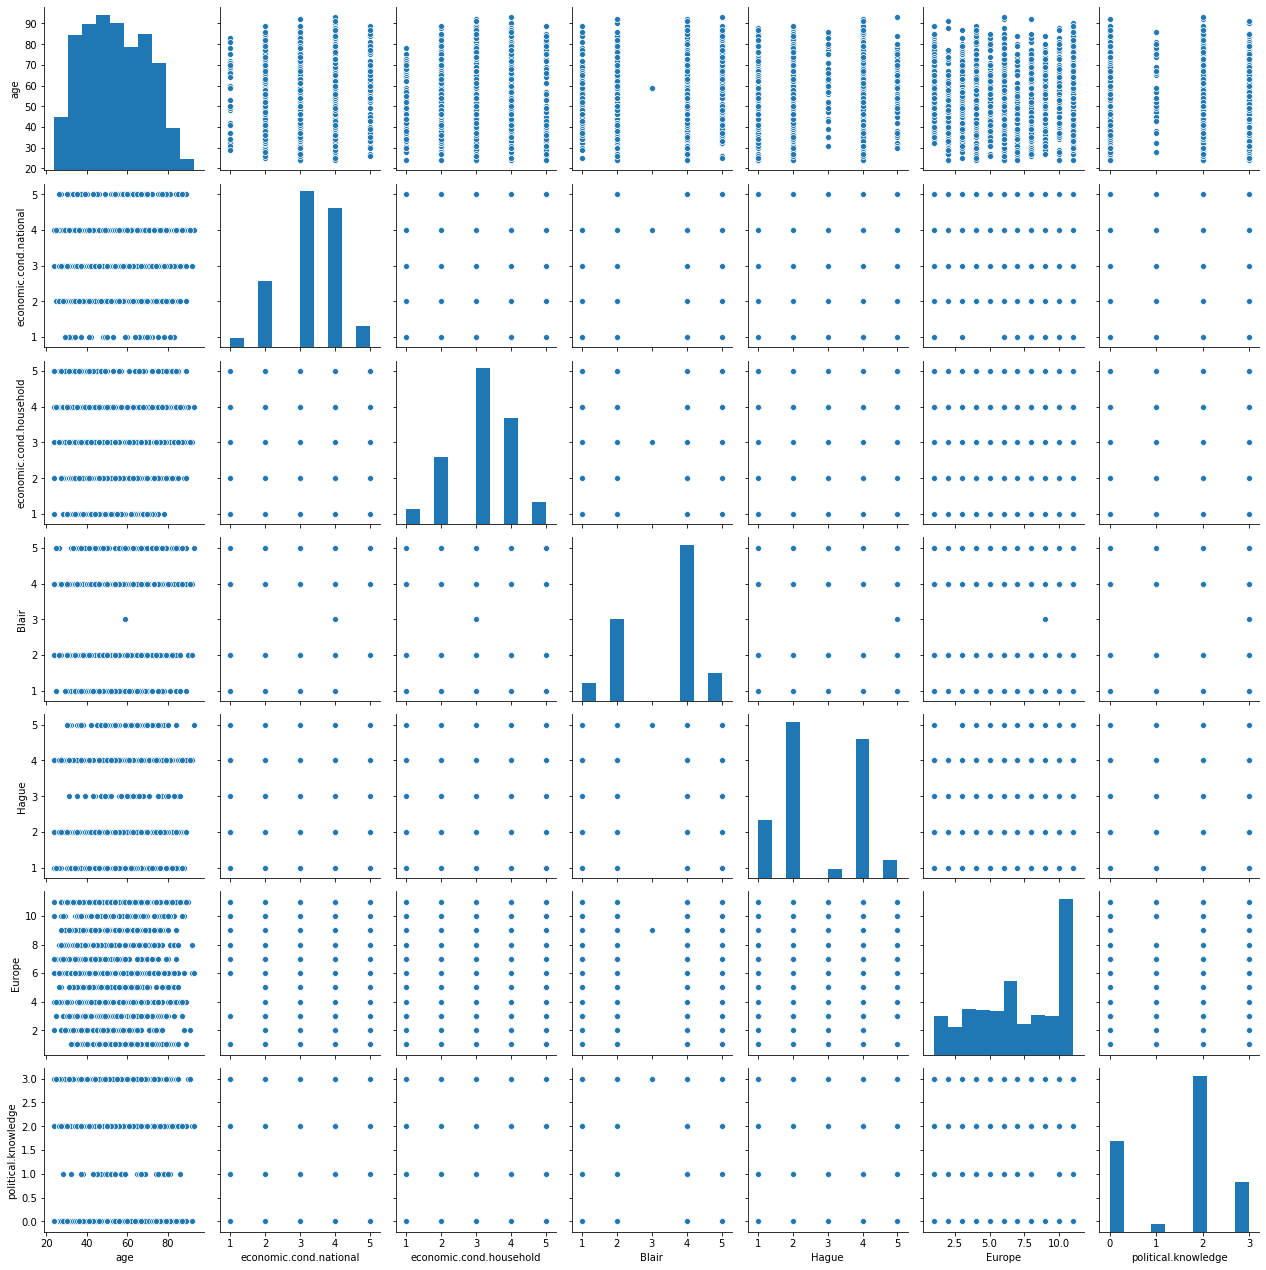

In [41]:
sns.pairplot(df)

In [42]:
df.corr().T

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


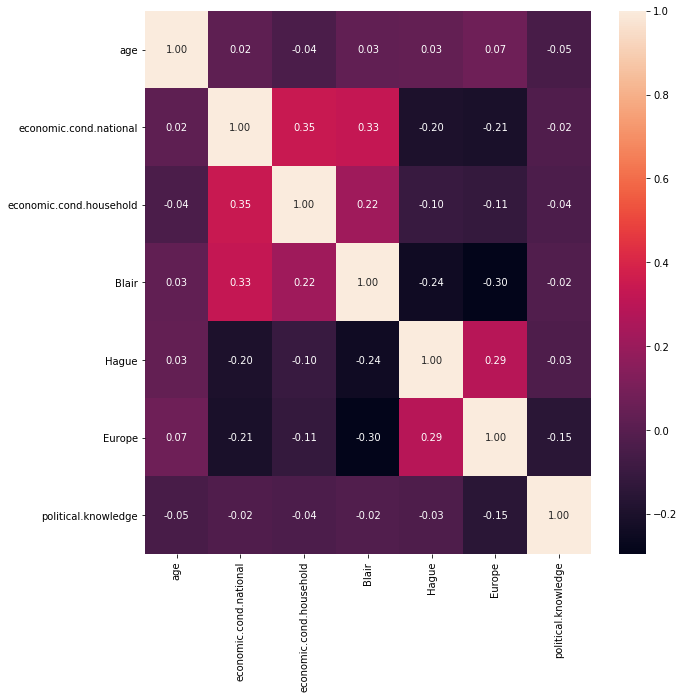

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

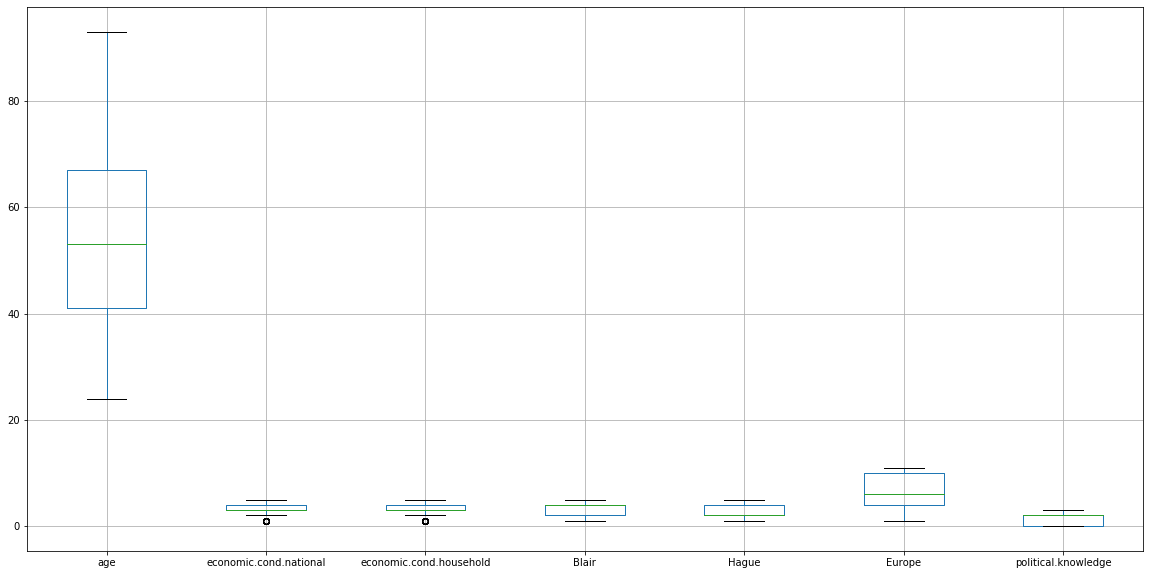

In [44]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [45]:
def remove_outlier(col):
 sorted(col)
 Q1,Q3=np.percentile(col,[25,75])
 IQR=Q3-Q1
 lower_range= Q1-(1.5 * IQR)
 upper_range= Q3+(1.5 * IQR)
 return lower_range, upper_range


In [46]:
lr,ur=remove_outlier(df['economic.cond.national'])
df['economic.cond.national']=np.where(df['economic.cond.national']>ur,ur,df['economic.cond.national'])
df['economic.cond.national']=np.where(df['economic.cond.national']<lr,lr,df['economic.cond.national'])
lr,ur=remove_outlier(df['economic.cond.household'])
df['economic.cond.household']=np.where(df['economic.cond.household']>ur,ur,df['economic.cond.household'])
df['economic.cond.household']=np.where(df['economic.cond.household']<lr,lr,df['economic.cond.household'])

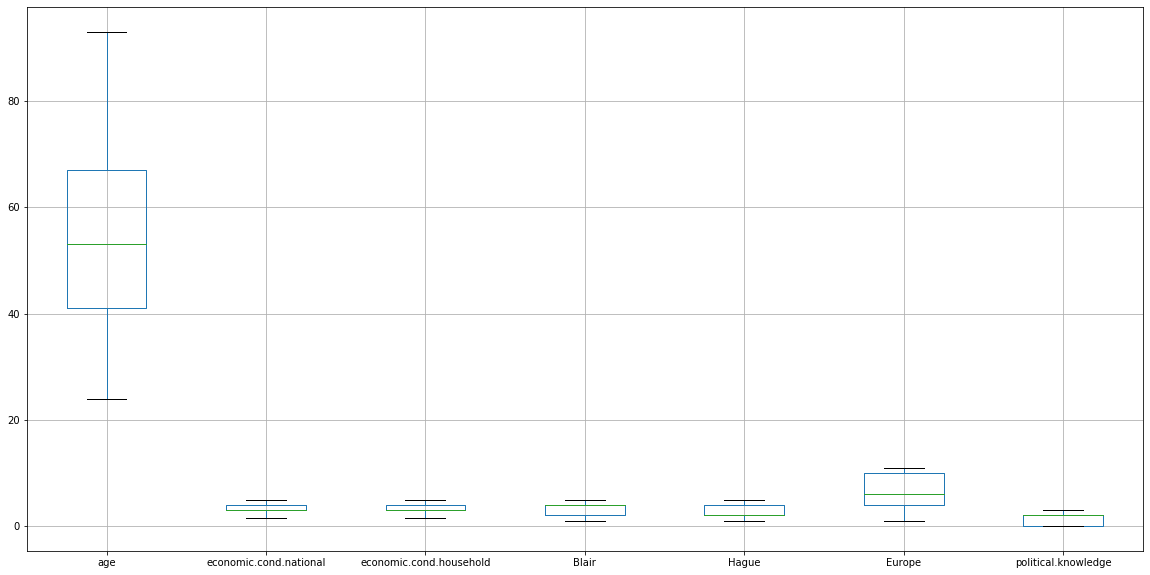

In [47]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [48]:
cat=['vote','gender']

In [49]:
df=pd.get_dummies(df,columns=cat,drop_first=True)
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [50]:
X=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
Logistic_model=LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)
Logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_train_predict=Logistic_model.predict(X_train)
model_score=Logistic_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [55]:
y_test_predict=Logistic_model.predict(X_test)
model_score=Logistic_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [56]:
y_train_proba=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_proba).head()

,0,1
0,0.616882,0.383118
1,0.189721,0.810279
2,0.186372,0.813628
3,0.170919,0.829081
4,0.051637,0.948363


In [57]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [58]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [59]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [60]:
y_train_proba=LDA_model.predict_proba(X_train)
pd.DataFrame(y_train_proba).head()

,0,1
0,0.648650,0.351350
1,0.162890,0.837110
2,0.180964,0.819036
3,0.137686,0.862314
4,0.038738,0.961262


## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
### Initiantiate Learn model(k=3)
KNN_model= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
### fitting model
KNN_model.fit(X_train,y_train)
##Predicting the response
y_train_predict=KNN_model.predict(X_train)
## evaluate accuracy
print("Accuracy score for K=3 is",KNN_model.score(X_train,y_train))
### Initiantiate Learn model(k=5)
KNN_model= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
### fitting model
KNN_model.fit(X_train,y_train)
##Predicting the response
y_train_predict=KNN_model.predict(X_train)
## evaluate accuracy
print("Accuracy score for K=5 is",KNN_model.score(X_train,y_train))
### Initiantiate Learn model(k=7)
KNN_model= KNeighborsClassifier(n_neighbors=7,metric='euclidean')
### fitting model
KNN_model.fit(X_train,y_train)
##Predicting the response
y_train_predict=KNN_model.predict(X_train)
## evaluate accuracy
print("Accuracy score for K=7 is",KNN_model.score(X_train,y_train))

Accuracy score for K=3 is 0.8753514526710403
Accuracy score for K=5 is 0.8556701030927835
Accuracy score for K=7 is 0.8500468603561387


In [63]:
### Initiantiate Learn model(k=3)
KNN_model= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
### fitting model
KNN_model.fit(X_train,y_train)
##Predicting the response
y_train_predict_3=KNN_model.predict(X_train)
## evaluate accuracy
print("Accuracy score for K=3 is",KNN_model.score(X_train,y_train))
print(metrics.confusion_matrix(y_train,y_train_predict_3))
print(metrics.classification_report(y_train,y_train_predict_3))

Accuracy score for K=3 is 0.8753514526710403
[[254  78]
 [ 55 680]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       332
           1       0.90      0.93      0.91       735

    accuracy                           0.88      1067
   macro avg       0.86      0.85      0.85      1067
weighted avg       0.87      0.88      0.87      1067



In [64]:
### Initiantiate Learn model(k=3)
KNN_model= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
### fitting model
KNN_model.fit(X_test,y_test)
##Predicting the response
y_test_predict=KNN_model.predict(X_test)
## evaluate accuracy
print("Accuracy score for K=3 is",KNN_model.score(X_test,y_test))
### Initiantiate Learn model(k=5)
KNN_model= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
### fitting model
KNN_model.fit(X_test,y_test)
##Predicting the response
y_test_predict=KNN_model.predict(X_test)
## evaluate accuracy
print("Accuracy score for K=5 is",KNN_model.score(X_test,y_test))
### Initiantiate Learn model(k=7)
KNN_model= KNeighborsClassifier(n_neighbors=7,metric='euclidean')
### fitting model
KNN_model.fit(X_test,y_test)
##Predicting the response
y_train_predict=KNN_model.predict(X_test)
## evaluate accuracy
print("Accuracy score for K=7 is",KNN_model.score(X_test,y_test))

Accuracy score for K=3 is 0.8995633187772926
Accuracy score for K=5 is 0.888646288209607
Accuracy score for K=7 is 0.8799126637554585


In [65]:
### Initiantiate Learn model(k=3)
KNN_model= KNeighborsClassifier(n_neighbors=3,metric='euclidean')
### fitting model
KNN_model.fit(X_test,y_test)
##Predicting the response
y_test_predict_3=KNN_model.predict(X_test)
## evaluate accuracy
print("Accuracy score for K=3 is",KNN_model.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_test_predict_3))
print(metrics.classification_report(y_test,y_test_predict_3))

Accuracy score for K=3 is 0.8995633187772926
[[104  26]
 [ 20 308]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       130
           1       0.92      0.94      0.93       328

    accuracy                           0.90       458
   macro avg       0.88      0.87      0.87       458
weighted avg       0.90      0.90      0.90       458



In [66]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 # evaluate accuracy
 scores = knn.score(X_test, y_test)
 ac_scores.append(scores)
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.26419213973799127,
 0.23144104803493448,
 0.2139737991266376,
 0.20960698689956336,
 0.20742358078602618,
 0.21179039301310043,
 0.19432314410480345,
 0.18558951965065507,
 0.18558951965065507,
 0.18777292576419213]

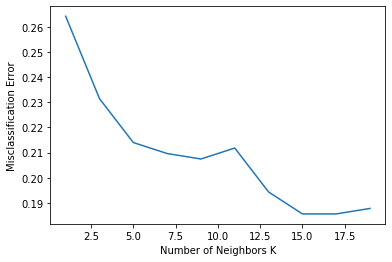

In [67]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [71]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8231441048034934
[[ 94  36]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [72]:
y_train_proba=NB_model.predict_proba(X_train)
pd.DataFrame(y_train_proba).head()

,0,1
0,0.730285,0.269715
1,0.282791,0.717209
2,0.102563,0.897437
3,0.171117,0.828883
4,0.022907,0.977093


## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting

In [73]:
from sklearn.model_selection import GridSearchCV
grid={'max_iter':[100,1000,10000],
 'n_jobs':[1,2,3],
 'penalty':['l1','l2'],
 'solver':['lbfgs','liblinear','newton-cg'],
 'tol':[0.01,0.0001,0.000001]}
Logistic_model=LogisticRegression(max_iter=100000,n_jobs=2)
grid_search=GridSearchCV(estimator=Logistic_model,param_grid=grid,cv=3)

In [74]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [100, 1000, 10000], 'n_jobs': [1, 2, 3],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.01, 0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [75]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 100, 'n_jobs': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=1, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [76]:
best_model_LR=grid_search.best_estimator_

In [77]:
y_train_predict=best_model_LR.predict(X_train)
model_score=best_model_LR.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8388003748828491
[[229 103]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [78]:
y_test_predict=best_model_LR.predict(X_test)
model_score=best_model_LR.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8209606986899564
[[ 85  45]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [79]:
y_train_predict_proba=best_model_LR.predict_proba(X_train)
pd.DataFrame(y_train_predict_proba).head()

,0,1
0,0.614995,0.385005
1,0.204249,0.795751
2,0.180807,0.819193
3,0.177540,0.822460
4,0.054035,0.945965


In [80]:
grid={'n_components':[0,5,1],
 'solver':['svd','lsqr','eigen'],
 'tol':[0.01,0.0001,0.00001]}
LDA_model=LinearDiscriminantAnalysis()
grid_search=GridSearchCV(estimator=LDA_model,param_grid=grid,cv=3)

In [81]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'n_components': [0, 5, 1],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.01, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_components': 0, 'solver': 'svd', 'tol': 0.01} 

LinearDiscriminantAnalysis(n_components=0, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.01)


In [85]:
best_model_LDA=grid_search.best_estimator_

In [86]:
y_train_predict=best_model_LDA.predict(X_train)
model_score=best_model_LDA.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8397375820056232
[[236  96]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [87]:
y_test_predict=best_model_LDA.predict(X_test)
model_score=best_model_LDA.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [108]:
y_train_predict_proba=best_model_LDA.predict_proba(X_train)
pd.DataFrame(y_train_predict_proba).head()

,0,1
0,0.648650,0.351350
1,0.162890,0.837110
2,0.180964,0.819036
3,0.137686,0.862314
4,0.038738,0.961262


In [109]:
leaf_size= list(range(1,50))
n_neighbors=list(range(1,50))
p=[1,2]
Hyper = dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
KNN_model=KNeighborsClassifier()
grid_search=GridSearchCV(KNN_model,Hyper,cv=5)

In [89]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [90]:
grid_search.best_params_

{'leaf_size': 14, 'n_neighbors': 38, 'p': 1}

In [91]:
best_model_Knn=grid_search.best_estimator_

In [92]:
y_train_predict=best_model_Knn.predict(X_train)
model_score=best_model_Knn.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8322399250234301
[[213 119]
 [ 60 675]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       332
           1       0.85      0.92      0.88       735

    accuracy                           0.83      1067
   macro avg       0.82      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [93]:
y_test_predict=best_model_Knn.predict(X_test)
model_score=best_model_Knn.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8122270742358079
[[ 81  49]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       130
           1       0.86      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



In [94]:
y_train_predict_proba=best_model_Knn.predict_proba(X_train)
pd.DataFrame(y_train_predict_proba).head()

,0,1
0,0.684211,0.315789
1,0.342105,0.657895
2,0.447368,0.552632
3,0.184211,0.815789
4,0.263158,0.736842


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DT_model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [97]:
y_train_predict=DT_model.predict(X_train)
model_score=DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8472352389878163
[[237  95]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [98]:
y_test_predict=DT_model.predict(X_test)
model_score=DT_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8122270742358079
[[ 87  43]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [99]:
print(pd.DataFrame(DT_model.feature_importances_,columns=['Imp'],index=X_train.columns))

                              Imp
age                      0.036732
economic.cond.national   0.022153
economic.cond.household  0.019490
Blair                    0.157607
Hague                    0.426457
Europe                   0.216291
political.knowledge      0.121270
gender_male              0.000000


In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [102]:
y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [105]:
y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8362445414847162
[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
Gradient_Boosting=GradientBoostingClassifier(random_state=1)
Gradient_Boosting.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
y_train_predict=Gradient_Boosting.predict(X_train)
model_score=Gradient_Boosting.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [111]:
y_test_predict=Gradient_Boosting.predict(X_test)
model_score=Gradient_Boosting.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



In [112]:
y_train_predict_proba=Gradient_Boosting.predict_proba(X_train)
pd.DataFrame(y_train_predict_proba).head()

,0,1
0,0.715613,0.284387
1,0.365785,0.634215
2,0.134966,0.865034
3,0.185846,0.814154
4,0.845788,0.154212


In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [114]:
ADa_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADa_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [115]:
y_train_predict=ADa_model.predict(X_train)
model_score=ADa_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [116]:
y_test_predict=ADa_model.predict(X_test)
model_score=ADa_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

#### Logistic Regression
#### AUC ROC curve for Logistic Regression Train

AUC: 0.890


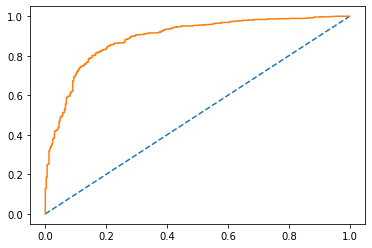

In [117]:
# predict probabilities
probs = best_model_LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.884


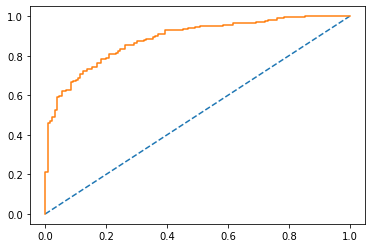

In [118]:
# predict probabilities
probs = best_model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Linear Discriminant Analysis
#### AUC ROC curve for LDA train

AUC: 0.889


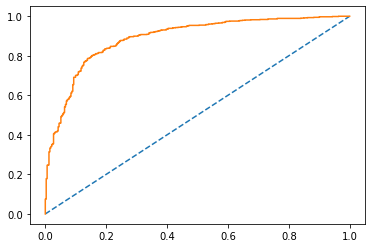

In [119]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.884


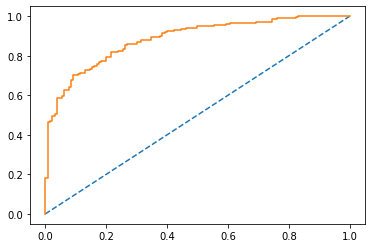

In [120]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### KNN Model
#### AUC ROC curve for KNN train

AUC: 0.882


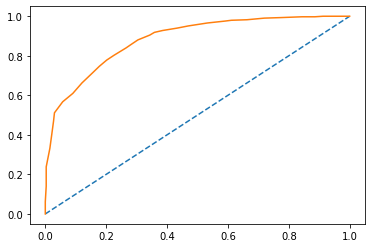

In [121]:
# predict probabilities
probs = best_model_Knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.877


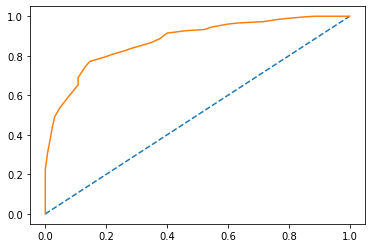

In [122]:
# predict probabilities
probs = best_model_Knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Naive Bayes
#### AUC ROC curve for Naive Bayes Train

AUC: 0.887


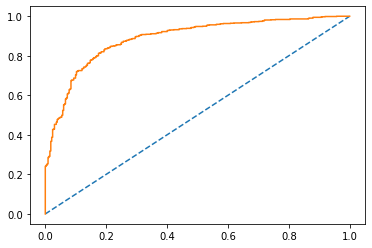

In [123]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.885


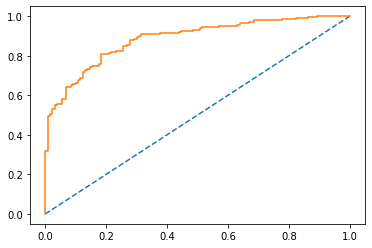

In [124]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Decision Tree model
#### AUC ROC Curve for Decicion Tree Train

AUC: 0.890


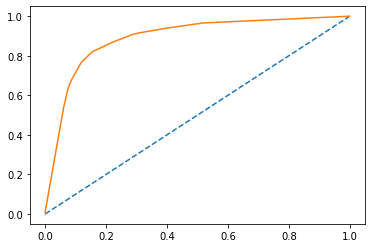

In [125]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.855


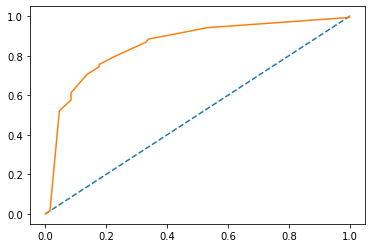

In [126]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Bagging Model
#### AUC ROC Curve for Bagging model Train

AUC: 0.997


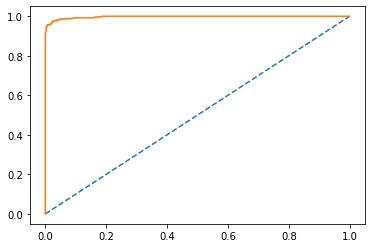

In [128]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.896


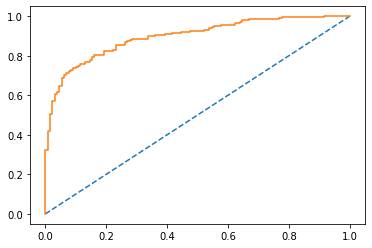

In [129]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Boosting
#### AUC ROC curve for Gradient Boosting for Train

AUC: 0.950


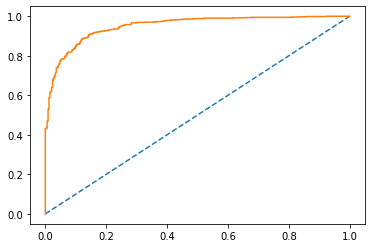

In [131]:
# predict probabilities
probs = Gradient_Boosting.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.904


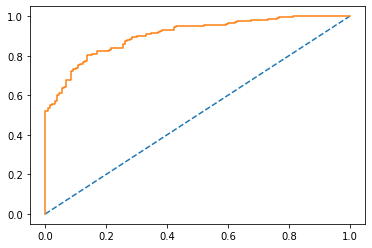

In [132]:
# predict probabilities
probs = Gradient_Boosting.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### AUC ROC Curve for Ada Boosting Train

AUC: 0.913


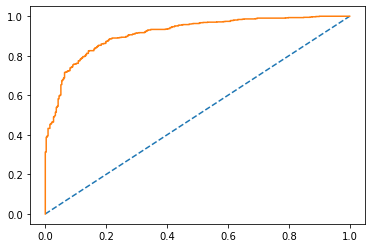

In [133]:
# predict probabilities
probs = ADa_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.879


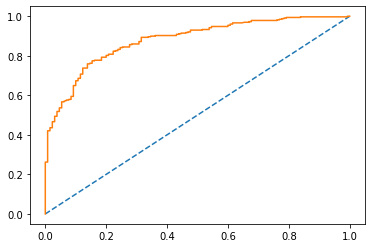

In [134]:
# predict probabilities
probs = ADa_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### The AUC score for Logistic Regression for train is 0.890 and for test is 0.884
#### The AUC score for LDA for train is 0.889 and for test is 0.884
#### The AUC score for KNN model for train is 0.781 and test is 0.958
#### The AUC score for NB model for train is 0.887 and 0.885
#### The AUC score for DT model for train is 0.890 and 0.855
#### The AUC score for Bagging Model for train is 0.997 and 0.897
#### The AUC score for Gradient Boosting for train is 0.950 and 0.904
#### The AUC score for Ada Boosting for train is 0.913 and 0.879.
#### As referring to the accuracy score Gradient Boosting has better perfroamnce and the accuracy is more compared to all the other models

## 1.8 Based on these predictions, what are the insights?
#### Accuracy on all the models appears to be similar to each other on train and test sets.
#### AUC is exactly same for both the train and the test data for all the models. While the KNN 78% and 95% on train and test data respectively.
#### From the summary of the confusion matrix, we can see that the actual and the predicted data are very close to each other. This is them reflection of the right fit model.
#### F1 score for both the models are almost same for both the models on train and test data.
#### Model tuning on decision tree and random forest models gives the better results than other models. But however, bagging on Random forest
#### performs well on both the train and test sets with god accuracy and overall other performance measures as well. - Boosting techniques has also shown a good performance results compare to all model.
#### Therefore there is no overfitting or under fitting issues in this case study.


## Problem 2

In [76]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\unnathi
[nltk_data]     u\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [77]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [78]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [79]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [80]:
len(inaugural.fileids())

59

In [83]:
import re 
import nltk

In [82]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [84]:
len(inaugural.raw('1961-Kennedy.txt'))

7618

In [85]:
data = inaugural.raw('1961-Kennedy.txt')
words = data.split()
print('Number of words in text file :', len(words))

Number of words in text file : 1390


In [86]:
len(inaugural.raw('1973-Nixon.txt'))

9991

In [87]:
data = inaugural.raw('1973-Nixon.txt')
words = data.split()
print('Number of words in text file :', len(words))

Number of words in text file : 1819


In [88]:
len(inaugural.raw('1941-Roosevelt.txt'))

7571

In [89]:
data = inaugural.raw('1941-Roosevelt.txt')
words = data.split()
print('Number of words in text file :', len(words))

Number of words in text file : 1360


In [90]:
inaugural.raw(inaugural.fileids()[38])

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [91]:
inaugural.words(inaugural.fileids()[38])

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [92]:
nltk.FreqDist(inaugural.words(inaugural.fileids()[38]))

FreqDist({'the': 104, 'of': 81, ',': 77, '.': 67, 'and': 44, 'to': 35, 'in': 30, 'a': 29, '--': 25, 'is': 24, ...})

In [93]:
nltk.FreqDist(inaugural.words(inaugural.fileids()[38])).most_common(30)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24),
 ('that', 22),
 ('we', 22),
 ('it', 15),
 ('our', 14),
 ('It', 13),
 ('this', 12),
 ('not', 11),
 ('all', 11),
 ('has', 10),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('have', 9),
 ('its', 9),
 ('spirit', 9),
 ('life', 9),
 ('because', 9),
 ('from', 8),
 ('us', 8),
 ('by', 8)]

In [94]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\unnathi
[nltk_data]     u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\unnathi
[nltk_data]     u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
all_words=['inaugural.raw(inaugural.fileids()[38])']
def lower(x):
 for w in x.words():
 words=w.lower()
 all_words.append(words)
 
lower(inaugural)
all_words

IndentationError: expected an indented block (<ipython-input-95-a17664c16f80>, line 4)

In [96]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [97]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [100]:

all_words_clean=['inaugural.words(inaugural.fileids()[38])']
def clean(x):
for word in x:
if word not in stopwords:
all_words_clean.append(word)
 
clean(all_words)
all_words_clean


IndentationError: expected an indented block (<ipython-input-100-6bb4b303dfac>, line 3)